# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [36]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

657

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [37]:
#set url
weather_url=f"http://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}&q="


In [38]:
# set lists for the dataframe
city_list = []
cloudiness = []
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []
country_list = []

# set initial count quantities for organization
counter = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(weather_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        country_list.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        if counter > 48:
            counter = 1
            set_one += 1
            city_list.append(city)
        else:
            counter += 1
            city_list.append(city)
        print(f"Processing Record {counter} of Set {set_one} | {city}")
    except Exception:
        print("This city is unavailable. Proceeding.....")
print("--------------------Call Done-----------")

Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | upernavik
This city is unavailable. Proceeding.....
Processing Record 3 of Set 1 | hamilton
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | esmeraldas
Processing Record 9 of Set 1 | talnakh
Processing Record 10 of Set 1 | victoria
Processing Record 11 of Set 1 | yerbogachen
Processing Record 12 of Set 1 | veraval
Processing Record 13 of Set 1 | robertsport
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | tuktoyaktuk
Processing Record 16 of Set 1 | narasannapeta
Processing Record 17 of Set 1 | saryozek
This city is unavailable. Proceeding.....
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | payo
This city is unavailable. Proceeding.....
This city is unavailable. Proceeding.....
P

Processing Record 26 of Set 4 | bodden town
This city is unavailable. Proceeding.....
This city is unavailable. Proceeding.....
Processing Record 27 of Set 4 | trairi
Processing Record 28 of Set 4 | paita
Processing Record 29 of Set 4 | port hardy
This city is unavailable. Proceeding.....
Processing Record 30 of Set 4 | santa cruz
Processing Record 31 of Set 4 | abbeville
Processing Record 32 of Set 4 | nantucket
Processing Record 33 of Set 4 | salihorsk
Processing Record 34 of Set 4 | emba
Processing Record 35 of Set 4 | jumla
Processing Record 36 of Set 4 | mahanoro
Processing Record 37 of Set 4 | longyearbyen
Processing Record 38 of Set 4 | pangnirtung
Processing Record 39 of Set 4 | srednekolymsk
This city is unavailable. Proceeding.....
Processing Record 40 of Set 4 | mackay
Processing Record 41 of Set 4 | maceio
Processing Record 42 of Set 4 | karlskrona
Processing Record 43 of Set 4 | cairns
Processing Record 44 of Set 4 | murgab
Processing Record 45 of Set 4 | cruzeiro do sul
P

Processing Record 7 of Set 8 | miranda
Processing Record 8 of Set 8 | kahului
Processing Record 9 of Set 8 | san pedro
This city is unavailable. Proceeding.....
Processing Record 10 of Set 8 | mulchen
Processing Record 11 of Set 8 | balkanabat
Processing Record 12 of Set 8 | deputatskiy
Processing Record 13 of Set 8 | bethel
Processing Record 14 of Set 8 | hay river
Processing Record 15 of Set 8 | makurdi
Processing Record 16 of Set 8 | boueni
Processing Record 17 of Set 8 | along
Processing Record 18 of Set 8 | plettenberg bay
Processing Record 19 of Set 8 | kavaratti
This city is unavailable. Proceeding.....
Processing Record 20 of Set 8 | copiapo
Processing Record 21 of Set 8 | port lincoln
This city is unavailable. Proceeding.....
Processing Record 22 of Set 8 | praia da vitoria
Processing Record 23 of Set 8 | russell
Processing Record 24 of Set 8 | brae
Processing Record 25 of Set 8 | gat
This city is unavailable. Proceeding.....
Processing Record 26 of Set 8 | adrar
Processing Re

Processing Record 33 of Set 11 | maldonado
Processing Record 34 of Set 11 | kyela
This city is unavailable. Proceeding.....
Processing Record 35 of Set 11 | puerto leguizamo
Processing Record 36 of Set 11 | morant bay
Processing Record 37 of Set 11 | galle
Processing Record 38 of Set 11 | kaseda
This city is unavailable. Proceeding.....
Processing Record 39 of Set 11 | rebrikha
Processing Record 40 of Set 11 | lugovoy
Processing Record 41 of Set 11 | yurimaguas
Processing Record 42 of Set 11 | rakiv lis
Processing Record 43 of Set 11 | swellendam
Processing Record 44 of Set 11 | manokwari
Processing Record 45 of Set 11 | tocopilla
Processing Record 46 of Set 11 | vostok
Processing Record 47 of Set 11 | ordu
Processing Record 48 of Set 11 | launceston
Processing Record 49 of Set 11 | jizan
Processing Record 1 of Set 12 | mahendranagar
Processing Record 2 of Set 12 | chifeng
Processing Record 3 of Set 12 | anloga
Processing Record 4 of Set 12 | monrovia
Processing Record 5 of Set 12 | la

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create the Data Frame
weather_col={"City":city_list,\
            "Lat":lat,\
            "Lng":lon,\
            "Max Temp":max_temp,\
            "Humidity":humidity,\
            "Cloudiness":cloudiness,\
            "Wind Speed":wind_speed,\
            "Country":country_list,\
            "Date":date}

weather_df=pd.DataFrame(weather_col)
#Display the DataFrame:
weather_df.head()


NameError: name 'city_list' is not defined

In [82]:
weather_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [83]:

# export to .csv
weather_df.to_csv(output_data_file)



In [9]:
weather_df=pd.read_csv("../output_data/cities.csv")
weather_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,bluff,-46.60,168.33,37.00,93,54,3.00,NZ,1591993398
1,1,upernavik,72.79,-56.15,32.67,94,0,3.11,GL,1591993408
2,2,hamilton,39.18,-84.53,84.99,28,40,6.93,US,1591993408
3,3,tasiilaq,65.61,-37.64,39.20,80,6,14.99,GL,1591993408
4,4,busselton,-33.65,115.33,48.99,81,68,10.58,AU,1591993408


In [14]:
clean_city_data=weather_df.drop(['Unnamed: 0'],axis=1)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bluff,-46.60,168.33,37.00,93,54,3.00,NZ,1591993398
1,upernavik,72.79,-56.15,32.67,94,0,3.11,GL,1591993408
2,hamilton,39.18,-84.53,84.99,28,40,6.93,US,1591993408
3,tasiilaq,65.61,-37.64,39.20,80,6,14.99,GL,1591993408
4,busselton,-33.65,115.33,48.99,81,68,10.58,AU,1591993408


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,5.750000e+02
mean,21.352835,23.236957,68.121843,67.707826,46.739130,8.048435,1.591994e+09
std,32.073560,84.542086,14.943329,22.159656,39.037569,5.476434,7.409460e+01
min,-54.800000,-175.200000,32.670000,1.000000,0.000000,0.070000,1.591993e+09
25%,-5.550000,-46.335000,57.020000,53.000000,3.000000,4.150000,1.591994e+09
50%,27.920000,27.460000,69.800000,73.000000,40.000000,6.730000,1.591994e+09
75%,46.425000,85.195000,78.990000,85.000000,90.000000,10.545000,1.591994e+09
max,78.220000,179.320000,102.310000,100.000000,100.000000,30.690000,1.591994e+09


In [16]:
high_humidities=clean_city_data.loc[clean_city_data["Humidity"] > 100]
high_humidities


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


I ran the above logic but got zero cities with humidities>100

In [19]:
#  Get the indices of cities that have humidity over 100%.
high_humidities.index[high_humidities['Humidity']].tolist()

[]

In [20]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [21]:
# Extract relevant fields from the data frame

clean_data_file = "../output_data/city_data.csv"
# Export the City_Data into a csv
clean_city_data.to_csv(clean_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

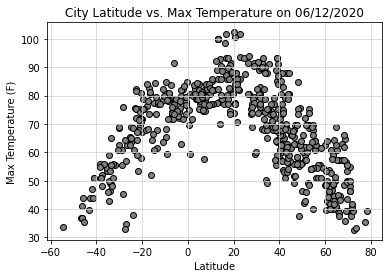

In [22]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"],edgecolors="black",facecolors="gray")
plt.title("City Latitude vs. Max Temperature on 06/12/2020")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/Fig1.png")
plt.show()

#It's summer time an it's hot. And the closer you get to the equator, as expected, the hoter the max temerature is.

## Latitude vs. Humidity Plot

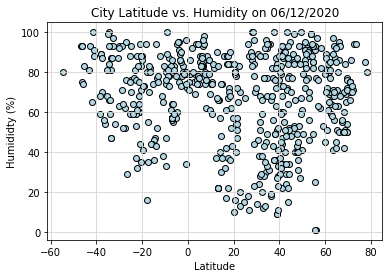

In [23]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"],edgecolors="black",facecolors="lightblue")
plt.title("City Latitude vs. Humidity on 06/12/2020")
plt.xlabel("Latitude")
plt.ylabel("Humididty (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/Fig2.png")
plt.show()

In June, it seems that humidities are lower in the North Eastern Hemisphere. but overall, the humidity is pretty high in summer months.

## Latitude vs. Cloudiness Plot

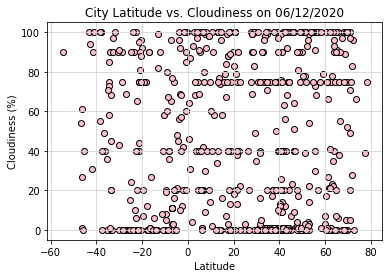

In [26]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"],edgecolors="black",facecolors="pink")
plt.title("City Latitude vs. Cloudiness on 06/12/2020")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/Fig3.png")
plt.show()

Cloudiness in June seems to be evenly spread, and not really determined by location.

## Latitude vs. Wind Speed Plot

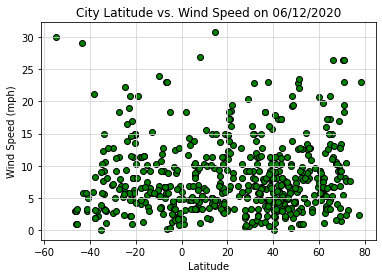

In [27]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"],edgecolors="black",facecolors="green")
plt.title("City Latitude vs. Wind Speed on 06/12/2020")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/Fig4.png")
plt.show()

Wind Speed is fairly low in June, probably due to the height of temperatures.

## Linear Regression

In [94]:
# OPTIONAL: Create a function to create Linear Regression plots

In [95]:
# Create Northern and Southern Hemisphere DataFrames

In [28]:
hemp_north=clean_city_data.loc[clean_city_data["Lng"] >= 0]
hemp_north.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bluff,-46.60,168.33,37.00,93,54,3.00,NZ,1591993398
4,busselton,-33.65,115.33,48.99,81,68,10.58,AU,1591993408
8,talnakh,69.49,88.40,39.20,72,0,13.42,RU,1591993429
9,victoria,22.29,114.16,82.00,83,40,13.18,HK,1591993379
10,yerbogachen,61.28,108.01,42.46,84,66,8.21,RU,1591993439


In [29]:
hemp_south=clean_city_data.loc[clean_city_data["Lng"] < 0]
hemp_south.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,upernavik,72.79,-56.15,32.67,94,0,3.11,GL,1591993408
2,hamilton,39.18,-84.53,84.99,28,40,6.93,US,1591993408
3,tasiilaq,65.61,-37.64,39.20,80,6,14.99,GL,1591993408
5,new norfolk,6.65,-10.59,80.60,83,20,3.36,LR,1591993418
6,hilo,19.73,-155.09,80.60,57,90,3.36,US,1591993419


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.18812900053058326
The equation of the regression line is: y = -0.08x + 68.06


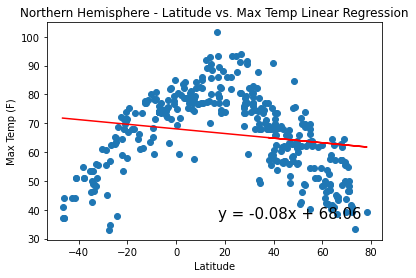

In [30]:
# Print out the r-squared value along with the plot.
x_values = hemp_north['Lat']
y_values = hemp_north['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Northern Hemisphere - Latitude vs. Max Temp Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")


plt.show()

The code is analyzing the linear relationsh8ip between temperatures above the equator

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.22657156474567453
The equation of the regression line is: y = -0.12x + 73.69


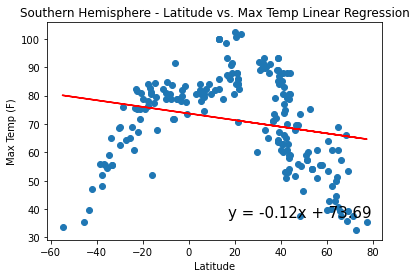

In [31]:
x_values = hemp_south['Lat']
y_values = hemp_south['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Southern Hemisphere - Latitude vs. Max Temp Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")


plt.show()

The code is analyzing the linear relationsh8ip between temperatures below the equator

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.13996735581375103
The equation of the regression line is: y = -0.09x + 73.1


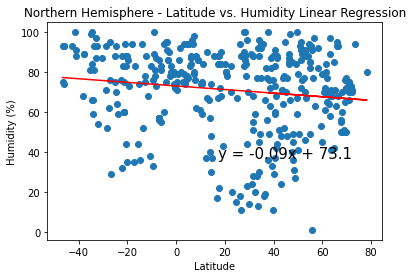

In [32]:
x_values = hemp_north['Lat']
y_values = hemp_north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Northern Hemisphere - Latitude vs. Humidity Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")


plt.show()

The code is analyzing the linear relationsh8ip between humidity above the equator

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.07020592440329608
The equation of the regression line is: y = -0.05x + 62.76


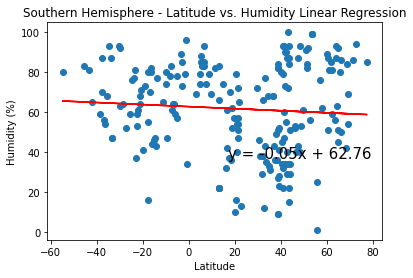

In [33]:
x_values = hemp_south['Lat']
y_values = hemp_south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Southern Hemisphere - Latitude vs. Humidity Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")


plt.show()

The code is analyzing the linear relationsh8ip between humidity below the equator

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.016872858877956098
The equation of the regression line is: y = -0.02x + 50.05


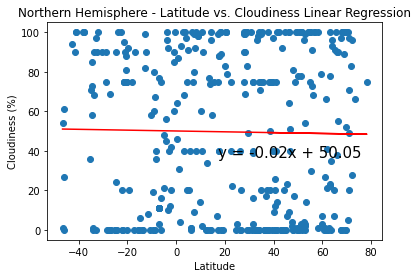

In [34]:
x_values = hemp_north['Lat']
y_values = hemp_north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Northern Hemisphere - Latitude vs. Cloudiness Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")


plt.show()

#The code is analyzing the linear relationsh8ip between how cloud it is above the equator

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11735887266306753
The equation of the regression line is: y = 0.13x + 38.96


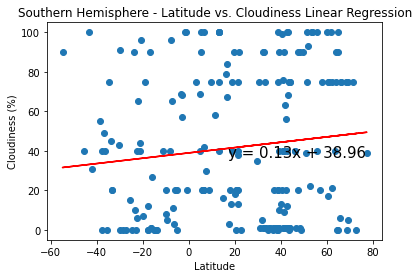

In [35]:
x_values = hemp_south['Lat']
y_values = hemp_south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Southern Hemisphere - Latitude vs. Cloudiness Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")


plt.show()

In [36]:
#The code is analyzing the linear relationsh8ip between how cloudy it is nr;pw the equator

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07268549030280569
The equation of the regression line is: y = 0.01x + 7.05


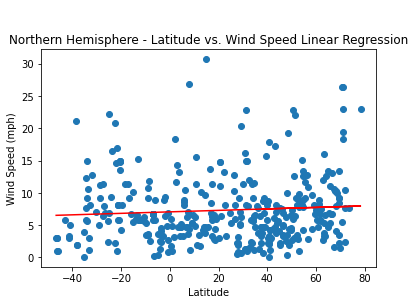

In [37]:
x_values = hemp_north['Lat']
y_values = hemp_north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Northern Hemisphere - Latitude vs. Wind Speed Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

#The code is analyzing the linear relationsh8ip between windspeed above the equator

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08777176995890604
The equation of the regression line is: y = 0.02x + 9.03


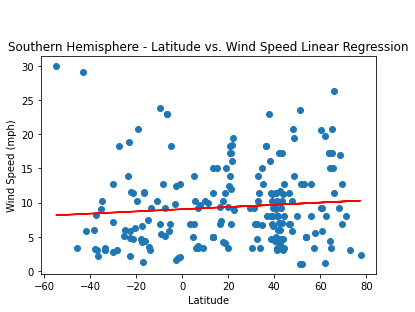

In [38]:
x_values = hemp_south['Lat']
y_values = hemp_south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Southern Hemisphere - Latitude vs. Wind Speed Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")


plt.show()

The code is analyzing the linear relationsh8ip between windspeed below the equator

Wind Speed is fairly low in June, probably due to the height of temperatures.Cloudiness in June seems to be evenly spread, and not really determined by location.In June, it seems that humidities are lower in the North Eastern Hemisphere. but overall, the humidity is pretty high in summer months.